In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
palette='coolwarm'

# 1. Data Import

In [3]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# 2. Discovering the data

## 2.1. Feature Analysis

## Data types

In [4]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Features types:

- Numerical:
    - Age (continuous)
    - RoomService (continuous)
    - FoodCourt (continuous)
    - ShoppingMall (continuous)
    - Spa (continuous)
    - VRDeck (continuous)
- Categorical:
    - HomePlanet (nominal)
    - CryoSleep (boolean)
    - Destination (nominal)
    - VIP (boolean)
    - Name (nominal)
- Mixed:
    - PassengerId (numeric)
    - Cabin (alphanumeric)


## Missing values

Percentage of missing values in each feature category:

In [6]:
train_data.isnull().sum()/8693*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

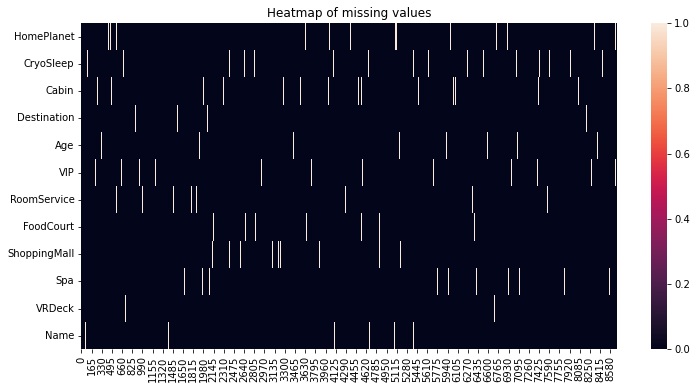

In [7]:
nan_cols=train_data.columns[train_data.isna().any()].tolist()
plt.figure(figsize=(12,6))
sns.heatmap(train_data[nan_cols].isna().T)
plt.title('Heatmap of missing values')
plt.show()

Only PassengerId has no missing values.
No more than 2.5 % of values are missed. It seems that inserting the most frequent values is appropriate.

## Numeric features

In [8]:
train_data.describe(include = np.number)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


There are too few old passengers.
There are outliers in Age, RoomService, FoodCourt, ShoppingMall, Spa and VRDeck features.

## Categorical and mixed features

In [9]:
train_data.describe(include = ['O']) # The top is the most common value. The freq is the most common value’s frequency.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


- All PassengerID were unique.
- 54.2 % of passengers were from Earth.
- 64.2 % of passengers did not use CryoSleep.
- 22.7 % of Cabin numbers were duplicated
- 69.4 % of passengers treveled to TRAPPIST-1e.
- 97.6 % of passengers did not buy VIP status.
- 0.23 % of Names were duplicated

## Target feature

In [10]:
train_data.describe(include = bool)

,Transported
count,8693
unique,2
top,True
freq,4378


50.3 % of passengers were transported 

## 2.2. Visualization. Exploratory Data Analysis (EDA)

In [11]:
train_data_eda = train_data.copy()
figsize=(10, 6)

# def transported_hist_plot(feature):
#     plt.figure(figsize=figsize)
#     sns.histplot(data=train_data_eda, x=feature, hue='Transported', binwidth=5, palette=palette, multiple='stack').set_title(f'{feature} vs Transported')
#     plt.show()
    
def transported_bar_plot(feature, data=train_data_eda, bins=0, cut_bins=False):
    if bins != 0:
        cut_labels = list(range(1, bins+1))
        temp_col = pd.cut(data[feature], bins=cut_bins, labels=cut_labels, right=False)
        plt.figure(figsize=figsize)
        sns.barplot(x=temp_col, y=data["Transported"], palette=palette).set_title(f'{feature}_cut vs Transported')
        plt.show()
    else:
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x=feature, y="Transported", palette=palette).set_title(f'{feature} vs Transported')
        plt.show()
        
def transported_count_plot(feature, data=train_data_eda, bins=0, cut_bins=False):
    if bins != 0:
        cut_labels = list(range(1, bins+1))
        temp_col = pd.cut(data[feature], bins=cut_bins, labels=cut_labels, right=False)
        plt.figure(figsize=figsize)
        sns.countplot(x=temp_col, hue=data['Transported'], palette=palette).set_title(f'{feature}_cut: Transported or Not')
        plt.show()
    else:
        plt.figure(figsize=figsize)
        sns.countplot(data=data, x=feature, hue='Transported', palette=palette).set_title(f'{feature}: Transported or Not')
        plt.show()
        
def transported_table(feature, data=train_data_eda, bins=0, cut_bins=False):
    if bins != 0:
        cut_labels = list(range(1, bins+1))
        temp_col = pd.Series(pd.cut(data[feature], bins=cut_bins, labels=cut_labels, right=False))
        temp_tab = pd.DataFrame(temp_col)
        temp_tab['Transported'] = train_data_eda['Transported']
        return temp_tab.groupby([feature], as_index=False).mean().sort_values(by='Transported', ascending=False).style.background_gradient(cmap=palette,low=0.75, high=1)
    else:
        return data[[feature, 'Transported']].groupby([feature], as_index=False).mean().sort_values(by='Transported', ascending=False).style.background_gradient(cmap=palette, low=0.75, high=1)

### 2.2.1. Categorical features.


### HomePlanet vs Transported

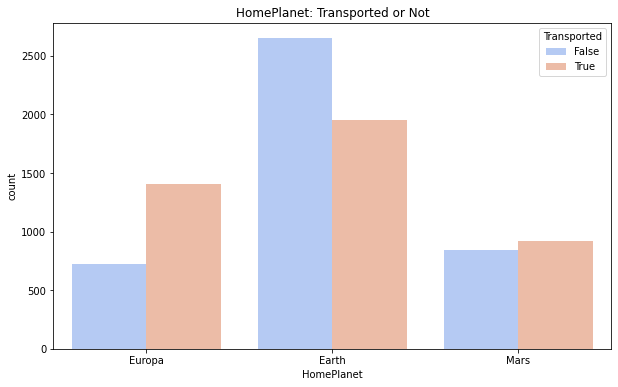

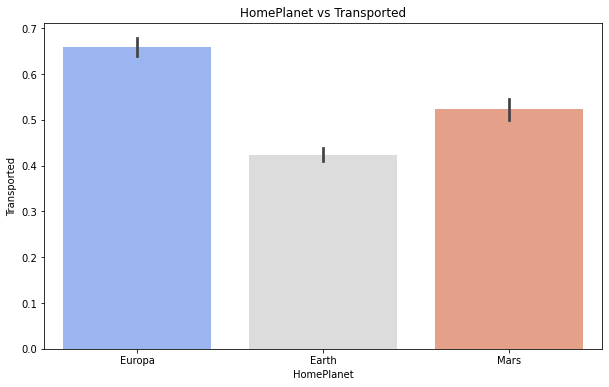

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [12]:
transported_count_plot('HomePlanet')
transported_bar_plot('HomePlanet')
transported_table('HomePlanet')

In [13]:
train_data_eda.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [14]:
train_data_eda[train_data_eda.HomePlanet.isnull()].groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,27.887755,329.875000,248.164948,158.520833,419.319588,478.163265
True,29.673267,79.555556,276.401961,125.306122,51.633663,99.245098


In [15]:
train_data_eda.groupby(train_data_eda.HomePlanet.isnull()).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,,,,,,,
False,28.828743,225.201034,462.756828,174.477626,313.029596,305.334979,0.503415
True,28.793970,202.789744,262.638191,141.742268,231.762626,284.915000,0.512438


In [16]:
train_data_eda.groupby(['HomePlanet', 'Transported']).mean()

Age  RoomService    FoodCourt  ShoppingMall  \
HomePlanet Transported                                                      
Earth      False        27.526559   196.489370   114.177220    108.256074   
           True         24.090814    56.368201   168.405744    168.887717   
Europa     False        36.588483   352.870423  1724.696801    162.040903   
           True         33.294975    38.789170  1386.633968    145.483565   
Mars       False        31.975550  1032.780340    71.515152    360.247874   
           True         26.857461   113.048943    38.568080    261.075556   

                                Spa       VRDeck  
HomePlanet Transported                            
Earth      False         218.701118   207.375725  
           True           39.714136    44.051471  
Europa     False        2240.669944  2289.286313  
           True          126.409753   141.309869  
Mars       False         219.567600    90.250000  
           True           10.695122     8.071429

- Passengers from Europa are more likely to be transported then ones from Mars then ones from Earth.
- 51.2 % passengers from unknown HomePlanet were transported.
- There is no dependency in missing values. Thus, it can be replaced with **"Earth"** according to **the highest frequency**.

### Destination vs Transported

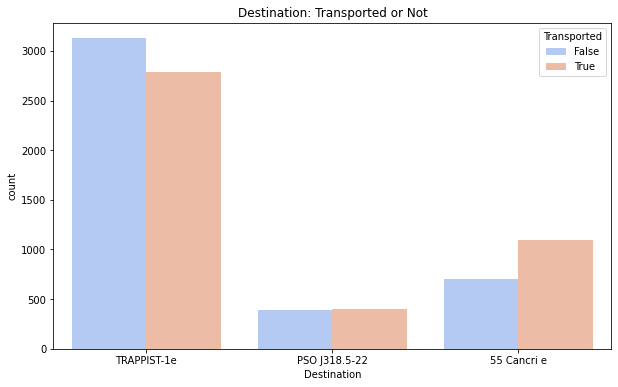

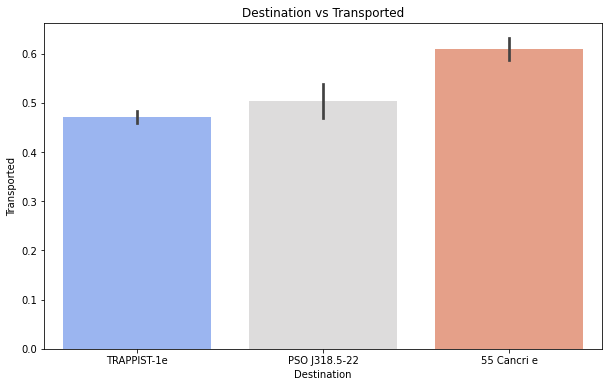

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [17]:
transported_count_plot('Destination')
transported_bar_plot('Destination')
transported_table('Destination')

In [18]:
train_data_eda.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [19]:
train_data_eda[train_data_eda.Destination.isnull()].groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,31.033333,365.888889,355.022989,136.786517,670.056818,407.022472
True,29.202247,45.921348,330.426966,162.818182,72.021978,38.846154


In [20]:
train_data_eda.groupby(train_data_eda.Destination.isnull()).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Destination,,,,,,,
False,28.800120,225.071883,460.516199,174.240491,309.959429,306.670270,0.503584
True,30.122905,206.798883,342.585227,149.728814,366.027933,220.888889,0.505495


In [21]:
train_data_eda.groupby(['Destination', 'Transported']).mean()

Age  RoomService   FoodCourt  ShoppingMall  \
Destination   Transported                                                     
55 Cancri e   False        30.360870   422.421739  892.269795    172.013255   
              True         28.629182    46.263645  885.456059    148.643057   
PSO J318.5-22 False        29.536082   128.371429  124.979328    112.414508   
              True         25.553299    53.315385  119.437659    114.142857   
TRAPPIST-1e   False        29.840419   415.370577  302.785691    174.416042   
              True         27.671308    71.705667  458.712813    202.223903   

                                   Spa       VRDeck  
Destination   Transported                            
55 Cancri e   False        1107.026277  1157.382482  
              True           81.471190    95.118140  
PSO J318.5-22 False         213.476804   245.338501  
              True           23.500000    37.576826  
TRAPPIST-1e   False         484.415741   448.060705  
              True           59.008065    64.500920

- Passengers travelled to 55 Cancri e are more likely to be transported then ones PSO J318.5-22 then ones to TRAPPIST-1e.
- The most passengers travelled to TRAPPIST-1e.
- There is no dependency in missing values. Thus, it can be replaced with **"TRAPPIST-1e"** according to **the highest frequency**.

### CryoSleep vs Transported

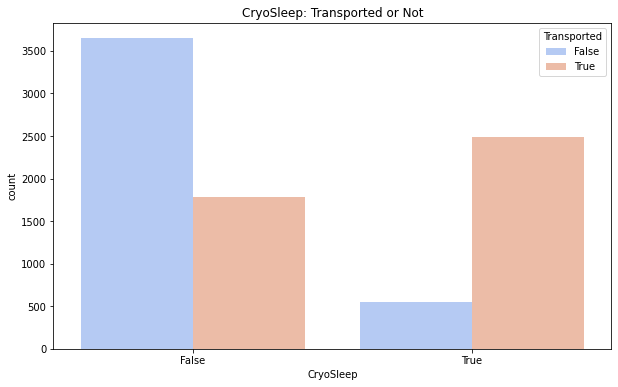

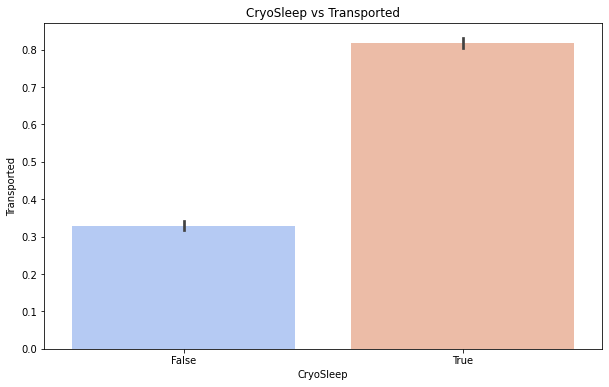

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [22]:
transported_count_plot('CryoSleep')
transported_bar_plot('CryoSleep')
transported_table('CryoSleep')

In [23]:
train_data_eda.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [24]:
train_data_eda[train_data_eda.CryoSleep.isnull()].groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.163636,376.572727,338.899083,182.790476,503.954128,528.688073
True,26.632075,52.723810,587.590476,108.846154,38.145631,43.099010


In [25]:
train_data_eda.groupby(train_data_eda.CryoSleep.isnull()).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,,,,,,,
False,28.851530,224.850187,458.003857,174.429555,311.994577,305.100663,0.504011
True,27.921296,218.413953,460.920561,145.995215,277.641509,295.142857,0.488479


In [26]:
train_data_eda.groupby(['CryoSleep', 'Transported']).mean()

Age  RoomService    FoodCourt  ShoppingMall  \
CryoSleep Transported                                                      
False     False        30.693575   448.336229   442.368009     192.31526   
          True         27.534884   150.920978  1265.083856     429.98008   
True      False        24.930970     0.000000     0.000000       0.00000   
          True         27.953700     0.000000     0.000000       0.00000   

                              Spa      VRDeck  
CryoSleep Transported                          
False     False        652.046206  627.053766  
          True         148.418234  166.724414  
True      False          0.000000    0.000000  
          True           0.000000    0.000000

- Passengers in CryoSleep are more likely to be transported. The most passengers did not use CryoSleep.
- Passengers in CryoSleep didn't pay for Spa and other.
- There is no dependency in missing values. Thus, it can be replaced with **"False"** according to **the highest frequency**.

### VIP vs Transported

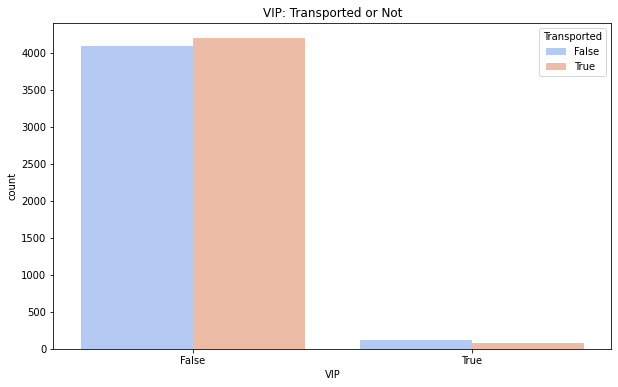

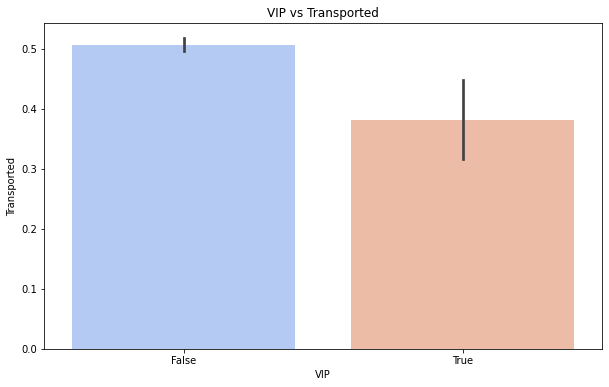

,VIP,Transported
0,False,0.506332
1,True,0.381910


In [27]:
transported_count_plot('VIP')
transported_bar_plot('VIP')
transported_table('VIP')

In [28]:
train_data_eda.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [29]:
train_data_eda[train_data_eda.VIP.isnull()].groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.375000,508.907216,340.357143,95.906250,482.214286,526.969388
True,26.544554,72.960784,537.455446,95.330097,31.009709,77.615385


In [30]:
train_data_eda.groupby(train_data_eda.VIP.isnull()).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
VIP,,,,,,,
False,28.849345,223.232888,458.500662,175.605358,312.593573,305.079489,0.503416
True,27.923858,285.457286,440.391960,95.608040,251.000000,295.618812,0.512315


In [31]:
train_data_eda.groupby(['VIP', 'Transported']).mean()

Age  RoomService    FoodCourt  ShoppingMall  \
VIP   Transported                                                      
False False        29.683383   376.094476   364.601596    166.532451   
      True         27.621990    62.819043   486.628439    181.076358   
True  False        38.221311   734.596639  1008.819672    260.176471   
      True         36.210526    64.973684  3190.464789    227.973333   

                           Spa       VRDeck  
VIP   Transported                            
False False         552.662253   505.697129  
      True           57.233633    65.064831  
True  False        1014.950820  1802.262295  
      True          347.146667   286.589041

- VIP passengers are less likely to be transported. The most passengers did not bye VIP.
- There is no dependency in missing values. Thus, it can be replaced with **"False"** according to **the highest frequency**.
- May be it is useless feature.

### 2.2.2. Numerical features

### Correlation Matrix

In [32]:
corr_matrix = train_data_eda.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

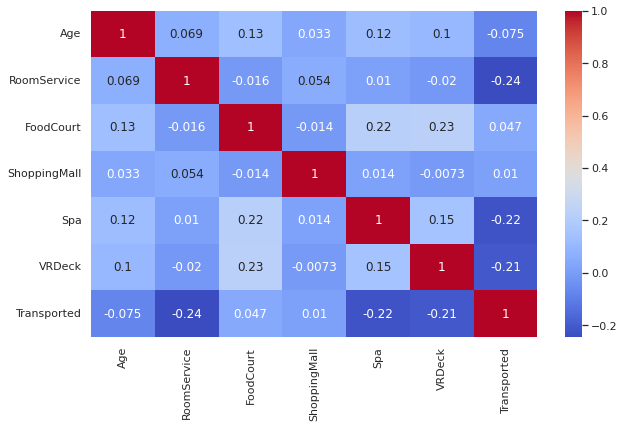

In [33]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_data_eda.corr(), annot = True, fmt='.2g',cmap=palette)
plt.show()

FoodCourt and ShoppingMall data can be deleted

### Age vs Transported

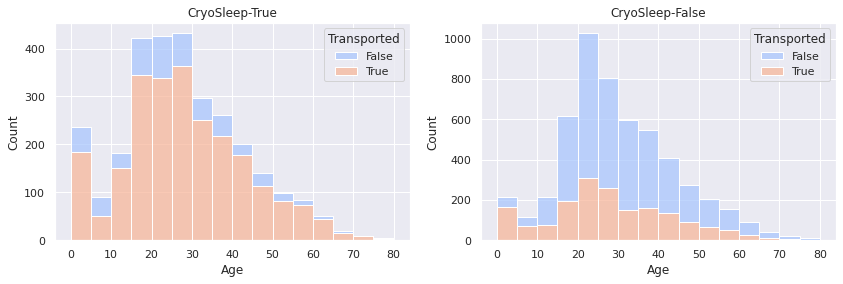

In [34]:
plot, ax = plt.subplots(1, 2, figsize=(14,4))
sns.histplot(data=train_data_eda.loc[train_data_eda["CryoSleep"]==True], x="Age", hue="Transported", binwidth=5, ax=ax[0], palette=palette, multiple = "stack").set_title("CryoSleep-True")
sns.histplot(data=train_data_eda.loc[train_data_eda["CryoSleep"]==False], x="Age", hue="Transported", binwidth=5, ax=ax[1], palette=palette, multiple = "stack").set_title("CryoSleep-False")
plt.show()

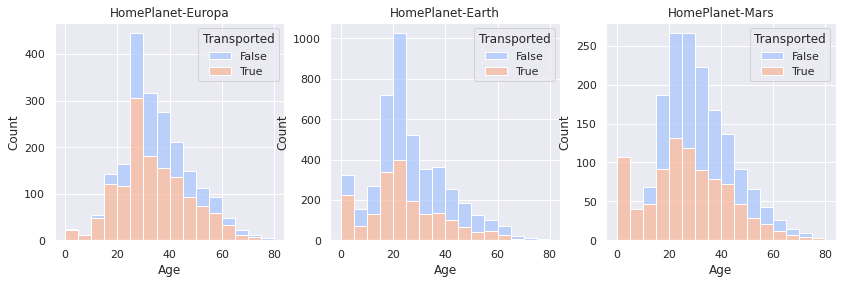

In [35]:
plot, ax = plt.subplots(1, 3, figsize=(14,4))
sns.histplot(data=train_data_eda.loc[train_data_eda["HomePlanet"]=='Europa'], x="Age", hue="Transported", binwidth=5, ax=ax[0], palette=palette, multiple="stack").set_title("HomePlanet-Europa")
sns.histplot(data=train_data_eda.loc[train_data_eda["HomePlanet"]=='Earth'], x="Age", hue="Transported", binwidth=5, ax=ax[1], palette=palette, multiple="stack").set_title("HomePlanet-Earth")
sns.histplot(data=train_data_eda.loc[train_data_eda["HomePlanet"]=='Mars'], x="Age", hue="Transported", binwidth=5, ax=ax[2], palette=palette, multiple="stack").set_title("HomePlanet-Mars")
plt.show()

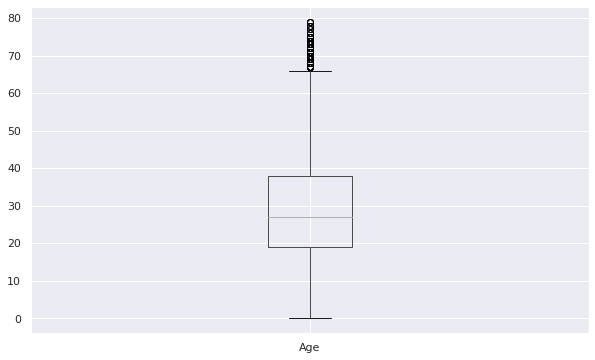

In [36]:
train_data_eda.boxplot(column=['Age'])
plt.show()

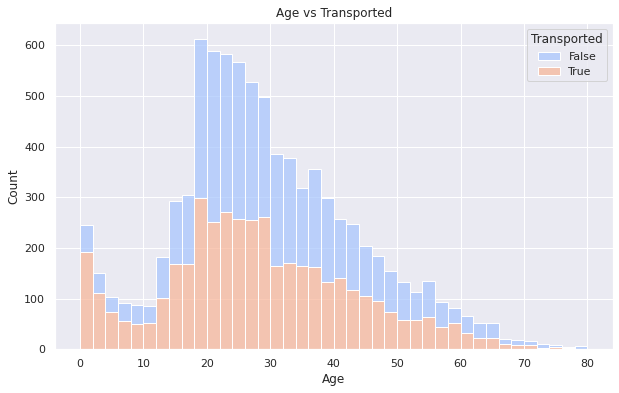

In [37]:
plt.figure(figsize=figsize)
sns.histplot(data=train_data_eda, x='Age', hue='Transported', binwidth=2, palette=palette, multiple='stack').set_title(f'Age vs Transported')
plt.show()

In [38]:
transported_table('Age')

,Age,Transported
0,0.000000,0.808989
3,3.000000,0.786667
59,59.000000,0.771429
4,4.000000,0.746479
1,1.000000,0.731343
12,12.000000,0.707317
2,2.000000,0.706667
70,70.000000,0.666667
68,68.000000,0.666667
10,10.000000,0.641026


In [39]:
train_data_eda[train_data_eda.Age.isnull()].groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,NaN,299.629213,468.080460,119.431818,659.056818,510.00000
True,NaN,33.932584,365.806818,84.080460,51.433333,48.83908


In [40]:
train_data_eda.groupby(train_data_eda.Age.isnull()).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,,,,,,,
False,28.82793,225.924406,458.946971,175.242720,310.269443,305.361465,0.503641
True,NaN,166.780899,416.651429,101.857143,351.831461,280.737143,0.502793


In [41]:
train_data_eda.groupby(['Age']).mean().tail(15)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,,,,,,
65.0,332.869565,717.434783,141.238095,166.347826,388.428571,0.304348
66.0,307.285714,1002.428571,322.200000,439.428571,6.428571,0.571429
67.0,152.916667,515.153846,173.923077,853.461538,185.538462,0.538462
68.0,54.000000,1143.666667,225.083333,2077.333333,87.583333,0.666667
69.0,843.333333,68.000000,87.500000,31.666667,1588.833333,0.166667
70.0,73.222222,353.444444,0.111111,548.444444,218.333333,0.666667
71.0,445.142857,189.571429,244.714286,14.714286,81.142857,0.428571
72.0,918.000000,755.750000,0.000000,176.000000,120.750000,0.500000
73.0,404.142857,0.428571,267.142857,674.833333,370.571429,0.142857


- Infants (age<=5) and childrens are most likely to be transported.
- Children didn't spend money!
- Most passengers are between 15 and 40 years old.
- There is no dependency in missing values. Thus, it can be replaced with **median value** according to the highest frequency.
- Age can be divided into regions: [0, 5), [5, 13), [13, 17), [17, 30), [30, 50), [50, 80)

### RoomService vs Transported

In [42]:
train_data_eda.RoomService.describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

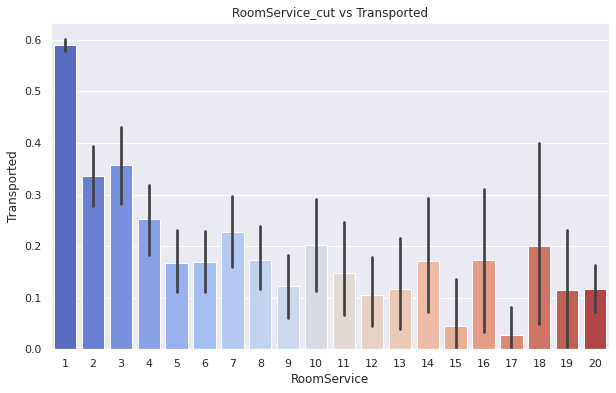

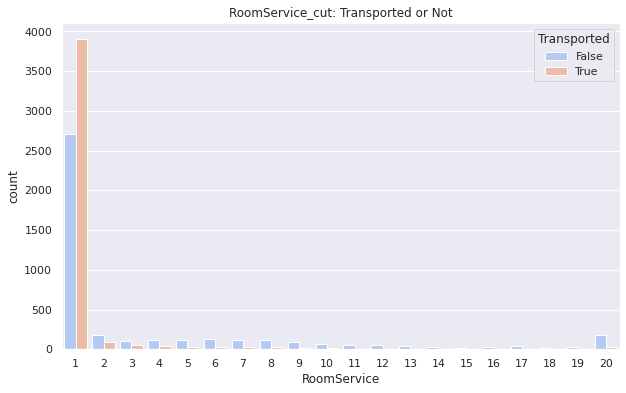

,RoomService,Transported
0,1,0.590573
2,3,0.356250
1,2,0.335878
3,4,0.253247
6,7,0.227586
9,10,0.202532
17,18,0.200000
7,8,0.173913
15,16,0.172414
13,14,0.170732


In [43]:
bins = 20
cut_bins = np.append(np.linspace(start=0, stop=2000, num=bins), np.inf)
transported_bar_plot('RoomService', bins=bins, cut_bins=cut_bins)
transported_count_plot('RoomService', bins=bins, cut_bins=cut_bins)
transported_table('RoomService', bins=bins, cut_bins=cut_bins)


- RoomService likely has exponential disrtibulion. Logarithm transformation can be applied to it.
- Missed values with CryoSleep==True can be replaced with 0 value the rest can be replaced with **the most frequent value**.
- There is some tendency to decrease transport probability with the increasing of RoomService payment.
- Due to the wide range, it can be divided into 4 regions: [0, 50), [50, 400), [400, 1000), [1000, inf).

## Spa vs Transported

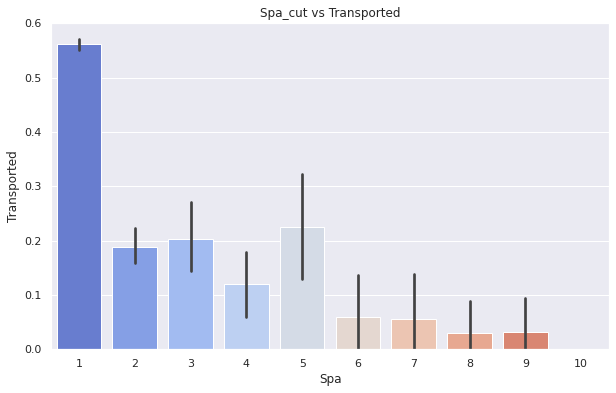

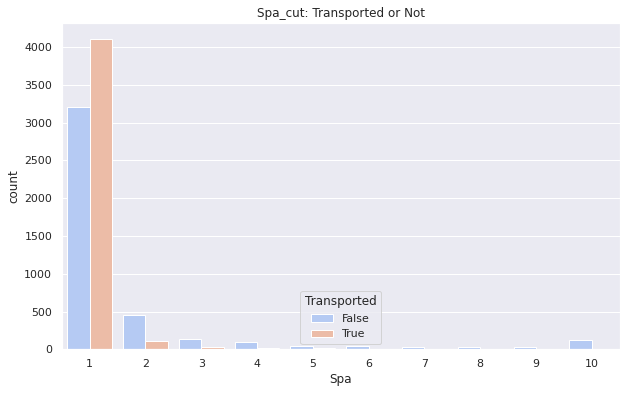

,Spa,Transported
0,1,0.561612
4,5,0.225806
2,3,0.202312
1,2,0.188948
3,4,0.119658
5,6,0.058824
6,7,0.055556
8,9,0.031250
7,8,0.029412
9,10,0.000000


In [44]:
bins = 10
cut_bins = np.append(np.linspace(start=0, stop=4500, num=bins), np.inf)
transported_bar_plot('Spa', bins=bins, cut_bins=cut_bins)
transported_count_plot('Spa', bins=bins, cut_bins=cut_bins)
transported_table('Spa', bins=bins, cut_bins=cut_bins)

- Spa likely has exponential disrtibulion. Logarithm transformation can be applied to it.
- Missed values with CryoSleep==True can be replaced with 0 value the rest can be replaced with **the most frequent value**.
- Passengers paid more for Spa are less likely to be transported.
- Due to the wide range, it can be divided into 3 regions: [0,500), [500, 2500), [2500, inf)

### VRDeck vs Transported

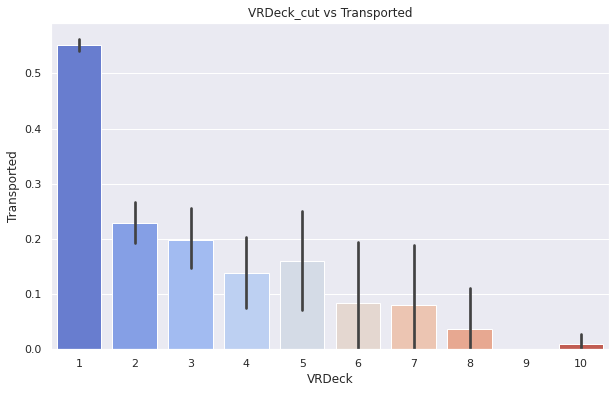

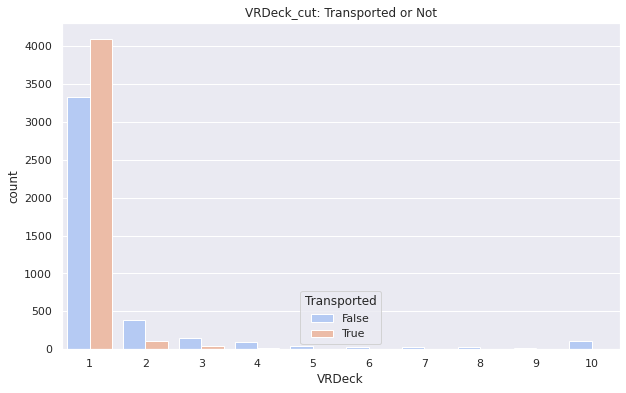

,VRDeck,Transported
0,1,0.551501
1,2,0.229376
2,3,0.198953
4,5,0.160714
3,4,0.138889
5,6,0.083333
6,7,0.081081
7,8,0.037037
9,10,0.009259
8,9,0.000000


In [45]:
bins = 10
cut_bins = np.append(np.linspace(start=0, stop=5000, num=bins), np.inf)
transported_bar_plot('VRDeck', bins=bins, cut_bins=cut_bins)
transported_count_plot('VRDeck', bins=bins, cut_bins=cut_bins)
transported_table('VRDeck', bins=bins, cut_bins=cut_bins)

- VRDeck likely has exponential disrtibulion. Logarithm transformation can be applied to it.
- Missed values with CryoSleep==True can be replaced with 0 value the rest can be replaced with **the most frequent value**.
- Passengers paid more for VRDeck are less likely to be transported.
- Due to the wide range, it can be divided into 2 regions: [0, 10), [100, inf)

### FoodCourt vs Transported

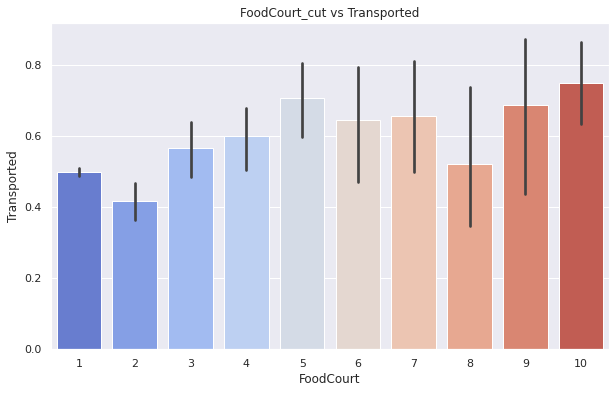

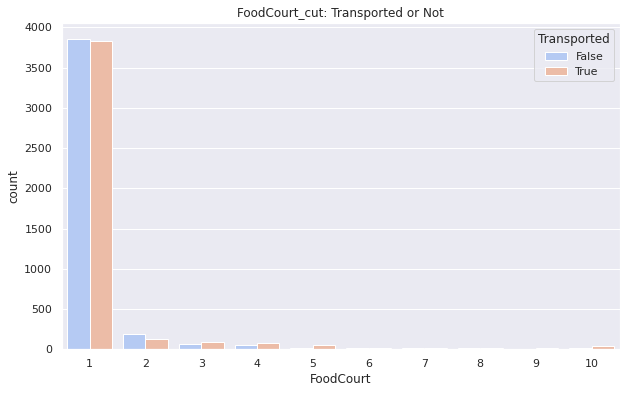

,FoodCourt,Transported
9,10,0.750000
4,5,0.708333
8,9,0.687500
6,7,0.656250
5,6,0.647059
3,4,0.600000
2,3,0.566667
7,8,0.521739
0,1,0.498179
1,2,0.417722


In [46]:
bins = 10
cut_bins = np.append(np.linspace(start=0, stop=10000, num=bins), np.inf)
transported_bar_plot('FoodCourt', bins=bins, cut_bins=cut_bins)
transported_count_plot('FoodCourt', bins=bins, cut_bins=cut_bins)
transported_table('FoodCourt', bins=bins, cut_bins=cut_bins)

- FoodCourt likely has exponential disrtibulion. Logarithm transformation can be applied to it.
- Missed values with CryoSleep==True can be replaced with 0 value the rest can be replaced with **the most frequent value**.
- Passengers paid more for FoodCourt are less likely to be transported.
- Due to the wide range, it can be divided into 10 regions: np.append(np.linspace(start=0, stop=10000, num=10), np.inf)

### ShoppingMall vs Transported

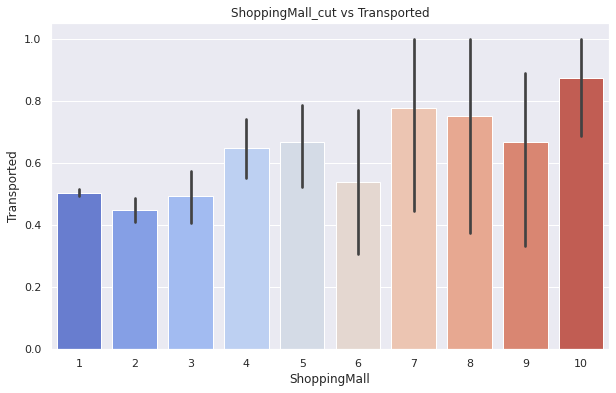

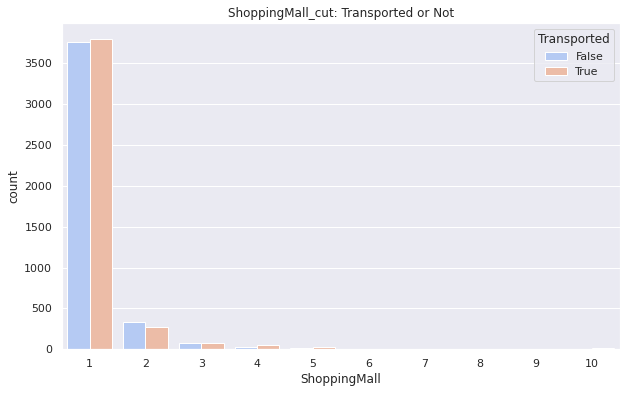

,ShoppingMall,Transported
9,10,0.875000
6,7,0.777778
7,8,0.750000
4,5,0.666667
8,9,0.666667
3,4,0.647059
5,6,0.538462
0,1,0.502980
2,3,0.493333
1,2,0.446844


In [47]:
bins = 10
cut_bins = np.append(np.linspace(start=0, stop=5000, num=bins), np.inf)
transported_bar_plot('ShoppingMall', bins=bins, cut_bins=cut_bins)
transported_count_plot('ShoppingMall', bins=bins, cut_bins=cut_bins)
transported_table('ShoppingMall', bins=bins, cut_bins=cut_bins)

- ShoppingMall likely has exponential disrtibulion. Logarithm transformation can be applied to it.
- Missed values with CryoSleep==True can be replaced with 0 value the rest can be replaced with **the most frequent value**.
- Passengers paid more for ShoppingMall are less likely to be transported.
- Due to the wide range, it can be divided into 10 regions: np.append(np.linspace(start=0, stop=5000, num=bins), np.inf)

### 2.2.3. Mixed features

### PassengerID vs Transported

In [48]:
train_data_eda['Group'] = train_data_eda.PassengerId.str.split('_',expand=True)[0]
train_data_eda[['Group']].describe()

,Group
count,8693
unique,6217
top,4498
freq,8


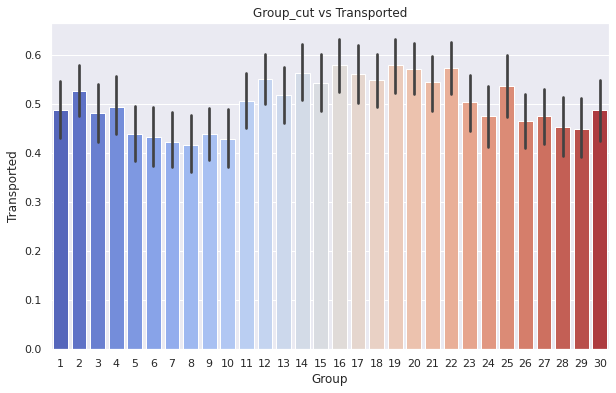

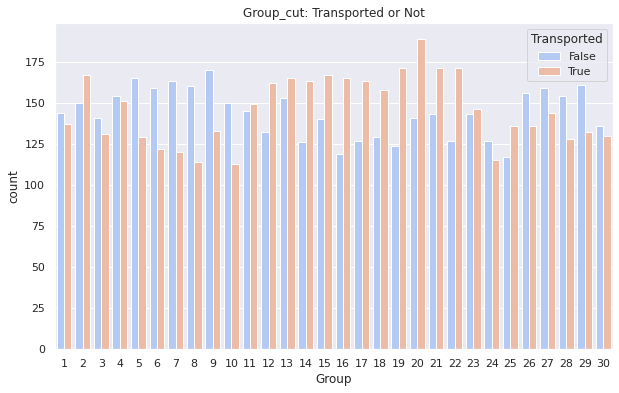

,Group,Transported
15,16,0.580986
18,19,0.579661
21,22,0.573826
19,20,0.572727
13,14,0.564014
16,17,0.562069
11,12,0.551020
17,18,0.550523
20,21,0.544586
14,15,0.543974


In [49]:
train_data_eda[['Group']] = train_data_eda[['Group']].astype(int)
bins = 30
cut_bins = np.append(np.linspace(start=0, stop=9000, num=bins), np.inf)
transported_bar_plot('Group', data=train_data_eda, bins=bins, cut_bins=cut_bins)
transported_count_plot('Group', data=train_data_eda, bins=bins, cut_bins=cut_bins)
transported_table('Group', data=train_data_eda, bins=bins, cut_bins=cut_bins)

In [50]:
train_data_eda['GroupSize'] = train_data_eda['Group'].map(lambda x: train_data_eda['Group'].value_counts()[x])

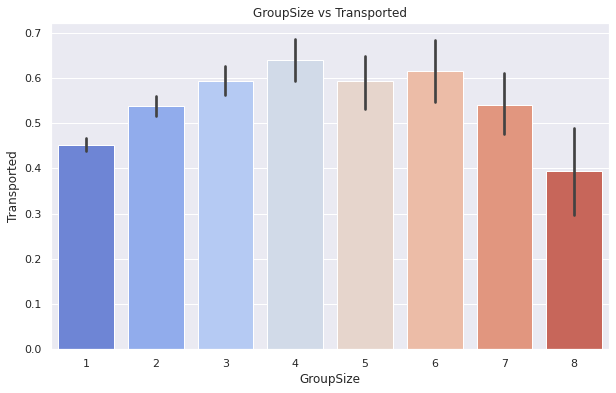

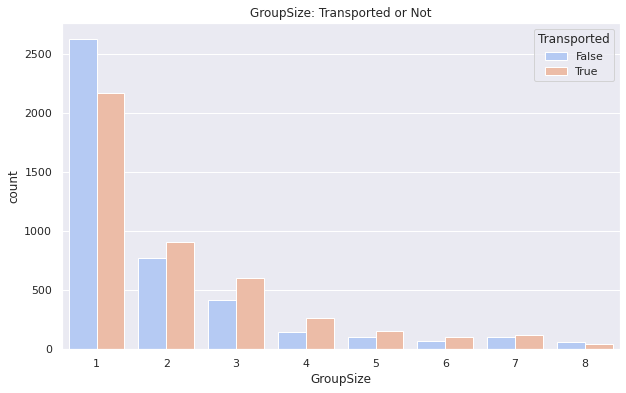

,GroupSize,Transported
3,4,0.640777
5,6,0.614943
2,3,0.593137
4,5,0.592453
6,7,0.541126
1,2,0.538050
0,1,0.452445
7,8,0.394231


In [51]:
transported_bar_plot('GroupSize', data=train_data_eda)
transported_count_plot('GroupSize', data=train_data_eda)
transported_table('GroupSize', data=train_data_eda)

- No strong correlation with Group and GroupSize.
- GroupSize is the amount of passengers in each group. A group may be a family.
- Solo feature for single trevelling passengers can be created.

### Cabin vs Transported

In [52]:
train_data_eda[['Deck', 'Num', 'Side']] = train_data_eda.Cabin.str.split('/',expand=True)
train_data_eda[['Deck', 'Num', 'Side']].describe()

,Deck,Num,Side
count,8494,8494,8494
unique,8,1817,2
top,F,82,S
freq,2794,28,4288


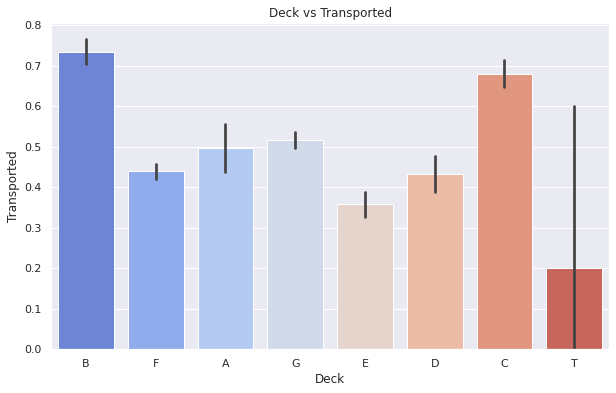

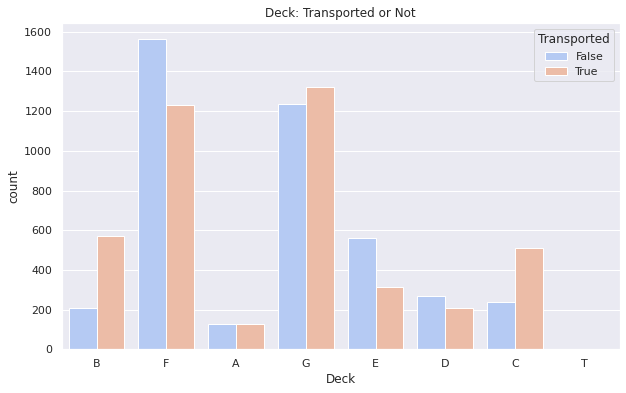

,Deck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


In [53]:
transported_bar_plot('Deck', data=train_data_eda)
transported_count_plot('Deck', data=train_data_eda)
transported_table('Deck', data=train_data_eda)

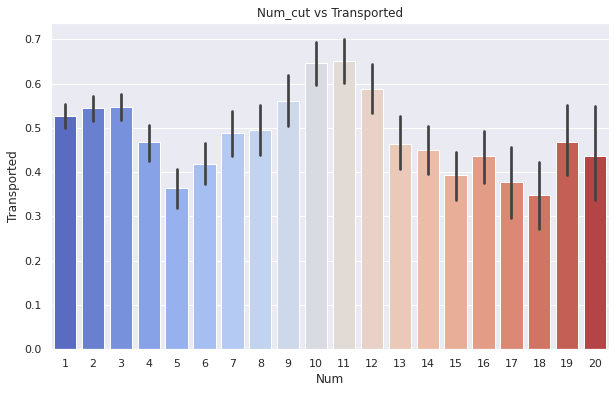

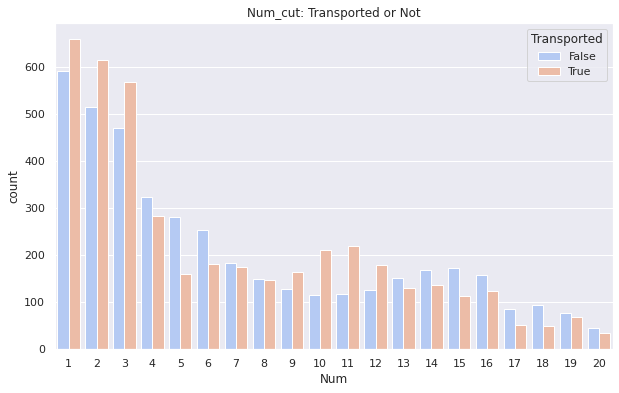

,Num,Transported
10,11,0.650888
9,10,0.645260
11,12,0.588235
8,9,0.561224
2,3,0.546679
1,2,0.543767
0,1,0.527534
7,8,0.494949
6,7,0.487465
18,19,0.468966


In [54]:
train_data_eda.Num = train_data_eda.Num.astype(float)
bins = 20
cut_bins = np.append(np.linspace(start=0, stop=1800, num=bins), np.inf)
transported_bar_plot('Num', data=train_data_eda, bins=bins, cut_bins=cut_bins)
transported_count_plot('Num', data=train_data_eda, bins=bins, cut_bins=cut_bins)
transported_table('Num', data=train_data_eda, bins=bins, cut_bins=cut_bins)

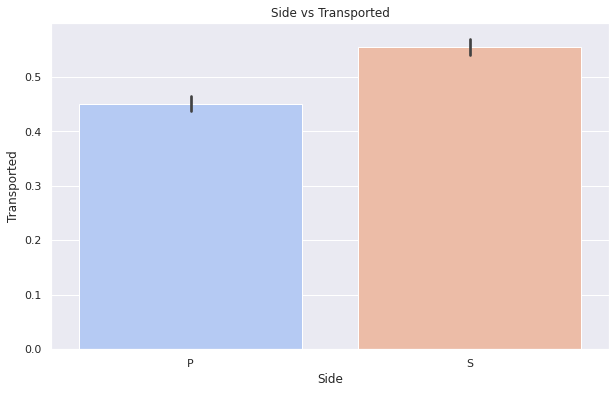

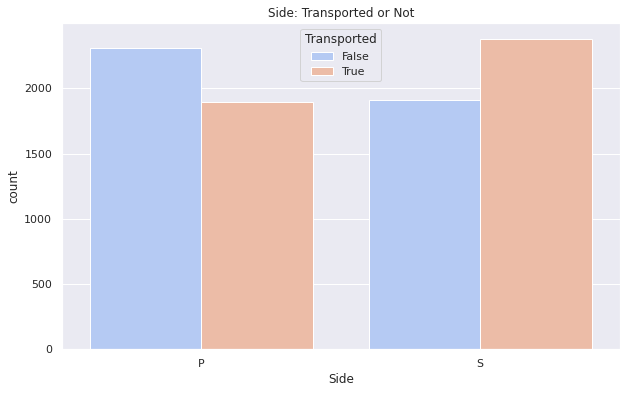

,Side,Transported
1,S,0.555037
0,P,0.451260


In [55]:
transported_bar_plot('Side', data=train_data_eda)
transported_count_plot('Side', data=train_data_eda)
transported_table('Side', data=train_data_eda)

- We can add Deck and Side as features to the dataset.
- Deck data can be merged to 5 groups: B+C, A+G, F+D, E, T.
- Missed values can be replaced with **the most frequent value**.

### Name vs Transported

In [56]:
train_data_eda[['Name', 'Family']] = train_data_eda.Name.str.split(' ', expand=True)
train_data_eda[['Name', 'Family']].describe()

,Name,Family
count,8493,8493
unique,2706,2217
top,Idace,Casonston
freq,13,18


In [57]:
dict_fam_size = dict(train_data_eda.groupby(['Family']).size())

In [58]:
train_data_eda['FamilySize'] = train_data_eda.Family.apply(lambda x: dict_fam_size.get(x, np.nan))

### 2.2.4. New features

### Luxury (RoomService + Spa + VRDeck)

In [59]:
train_data_eda['Luxury'] = train_data_eda.RoomService + train_data_eda.Spa + train_data_eda.VRDeck

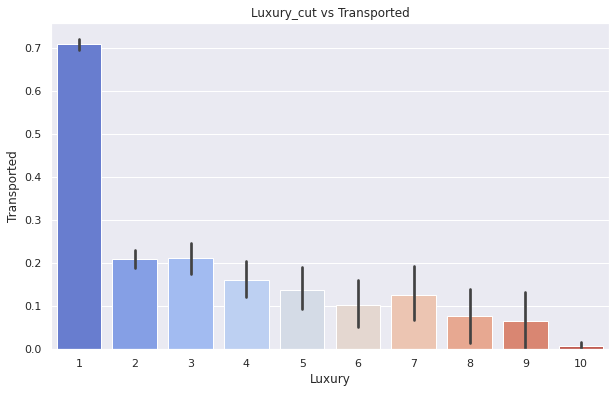

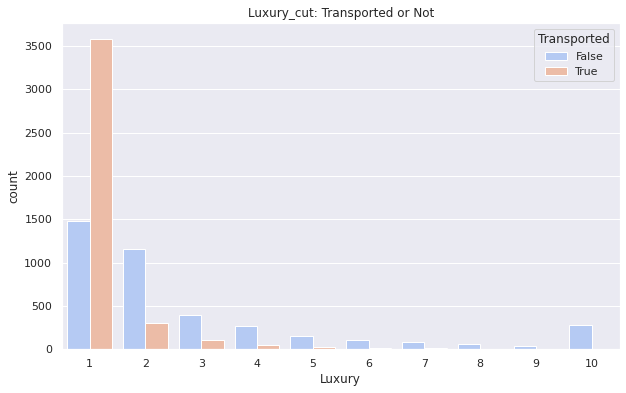

,Luxury,Transported
0,1,0.707240
2,3,0.211577
1,2,0.210239
3,4,0.160991
4,5,0.138728
6,7,0.126214
5,6,0.101695
7,8,0.078125
8,9,0.066667
9,10,0.006944


In [60]:
bins = 10
cut_bins = np.append(np.linspace(start=0, stop=5000, num=bins), np.inf)
transported_bar_plot('Luxury', bins=bins, cut_bins=cut_bins)
transported_count_plot('Luxury', bins=bins, cut_bins=cut_bins)
transported_table('Luxury', bins=bins, cut_bins=cut_bins)

- Luxury feature can replace separate features.
- Due to the wide range, it can be divided into 4 regions: [0, 500), [500, 1500), [1500, 3500), [3500 inf)

In [61]:
train_data_eda.groupby(['CryoSleep', 'Transported']).mean()

Age  RoomService    FoodCourt  ShoppingMall  \
CryoSleep Transported                                                      
False     False        30.693575   448.336229   442.368009     192.31526   
          True         27.534884   150.920978  1265.083856     429.98008   
True      False        24.930970     0.000000     0.000000       0.00000   
          True         27.953700     0.000000     0.000000       0.00000   

                              Spa      VRDeck        Group  GroupSize  \
CryoSleep Transported                                                   
False     False        652.046206  627.053766  4622.712055   1.846301   
          True         148.418234  166.724414  4678.469536   2.111235   
True      False          0.000000    0.000000  4227.507220   2.220217   
          True           0.000000    0.000000  4693.264599   2.205799   

                              Num  FamilySize       Luxury  
CryoSleep Transported                                       
False     False        622.583310    5.431774  1727.523572  
          True         598.140909    5.473594   464.447540  
True      False        629.402235    6.101476     0.000000  
          True         562.134934    5.230580     0.000000

### Expences (RoomService + Spa + VRDeck + FoodCourt + ShoppingMall)

In [62]:
train_data_eda['Expences'] = train_data_eda.RoomService + train_data_eda.Spa + train_data_eda.VRDeck + train_data_eda.FoodCourt + train_data_eda.ShoppingMall 

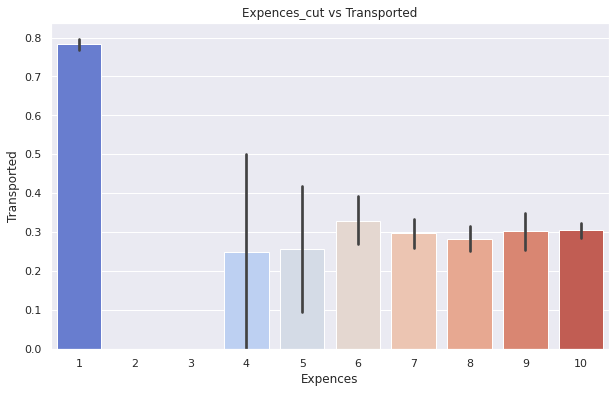

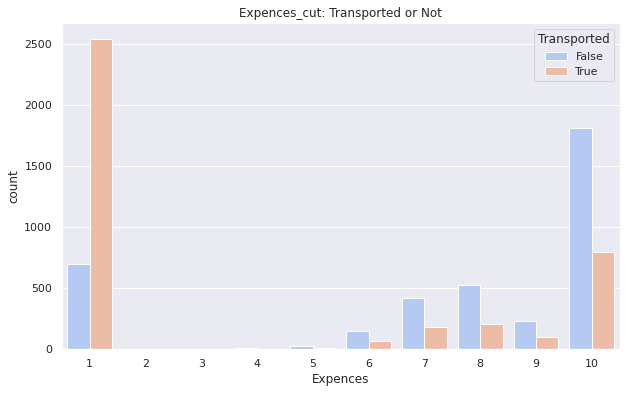

,Expences,Transported
0,1,0.783800
5,6,0.330275
9,10,0.305098
8,9,0.302395
6,7,0.298831
7,8,0.282993
4,5,0.258065
3,4,0.250000
1,2,nan
2,3,nan


In [63]:
bins = 10
cut_bins = np.append(np.linspace(start=0, stop=1000, num=bins), np.inf)
transported_bar_plot('Expences', bins=bins, cut_bins=cut_bins)
transported_count_plot('Expences', bins=bins, cut_bins=cut_bins)
transported_table('Expences', bins=bins, cut_bins=cut_bins)

- Expences feature can replace separate features.
- Due to the wide range, it can be divided into 2 regions: [0, 1), [1, inf)

## Correlation Matrix

In [64]:
corr_matrix = train_data_eda.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported     1.000000
GroupSize       0.082644
FoodCourt       0.046566
Group           0.021491
ShoppingMall    0.010141
FamilySize     -0.033312
Num            -0.045097
Age            -0.075026
Expences       -0.197671
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Luxury         -0.356140
Name: Transported, dtype: float64

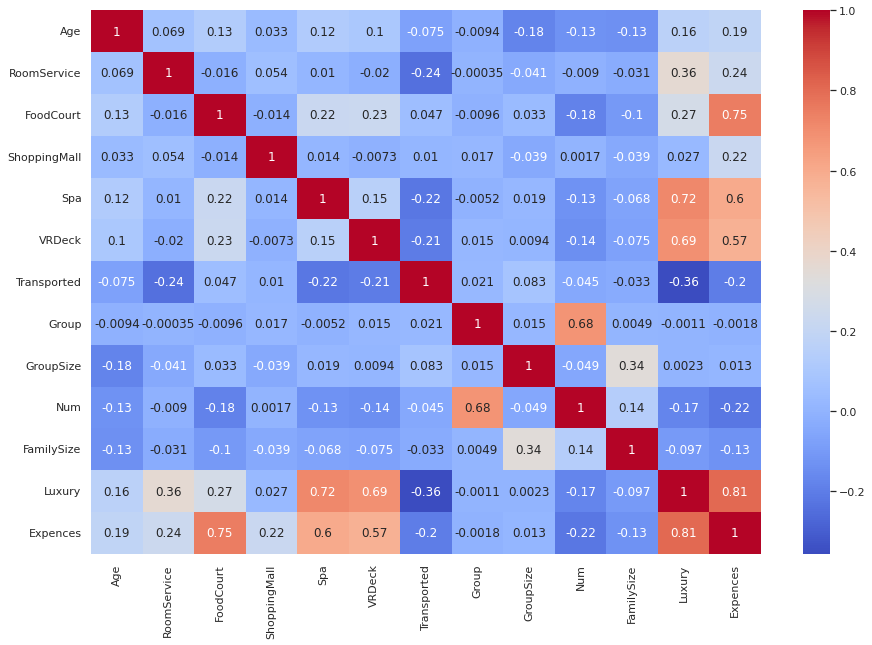

In [65]:
sns.set(rc = {'figure.figsize':(15, 10)})
sns.heatmap(train_data_eda.corr(), annot = True, fmt='.2g',cmap=palette)
plt.show()

# 3. Data Hendling

Basic concept:
- adding new features for Expences, Luxury, NoExpences, Deck, Num, Side, Group, GroupSize, FamilySize. 
- inserting missing values according to some insights.
- inserting with the most frequent values for all other missing values of features.
- ohehotencoging of HomePlanet, CryoSleep, Destination, VIP, Deck, Side features.
- scaling of Age by StandardScaler.
- scaling of numerical features by Logarithmic transformation.

In [66]:
X_train = train_data.drop('Transported', axis=1)
y_train = train_data['Transported'].copy()
X_test = test_data.copy()

## 3.1. Creating new features

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [68]:
cat_attribs = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
mixed_attribs = ['Cabin']
age_attribs = ['Age']
num_attribs = ['RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'ShoppingMall']
lux_attribs = ['RoomService', 'Spa', 'VRDeck']
all_attribs = cat_attribs + mixed_attribs + age_attribs + num_attribs 

In [69]:
X_train['Expences'] = X_train[num_attribs].sum(axis=1)
X_test['Expences'] = X_test[num_attribs].sum(axis=1)
X_train['Luxury'] = X_train[lux_attribs].sum(axis=1)
X_test['Luxury'] = X_test[lux_attribs].sum(axis=1)

In [70]:
X_train['NoExpences'] = (X_train['Expences']==0).astype(int)
X_test['NoExpences'] = (X_test['Expences']==0).astype(int)

In [71]:
X_train['Group'] = X_train.PassengerId.str.split('_',expand=True)[0]
X_test['Group'] = X_test.PassengerId.str.split('_',expand=True)[0]
X_train['GroupSize'] = X_train['Group'].parallel_map(lambda x: X_train['Group'].value_counts()[x])
X_test['GroupSize'] = X_test['Group'].parallel_map(lambda x: X_test['Group'].value_counts()[x])

In [72]:
X_train[['Deck', 'Num', 'Side']] = X_train.Cabin.str.split('/', expand=True)
X_test[['Deck', 'Num', 'Side']] = X_test.Cabin.str.split('/', expand=True)

In [73]:
X_train['Family'] = X_train.Name.str.split(' ', expand=True)[1]
X_test['Family'] = X_test.Name.str.split(' ', expand=True)[1]

In [74]:
X_train['FamilySize'] = X_train.Family.parallel_apply(lambda x: dict_fam_size.get(x, np.nan))
X_test['FamilySize'] = X_test.Family.parallel_apply(lambda x: dict_fam_size.get(x, np.nan))

In [75]:
X_train['AgeGroup'] = np.nan
X_test['AgeGroup'] = np.nan
for age1, age2 in (0, 5), (5, 13), (13, 17), (17, 30), (30, 50), (50, 80):
    X_train.loc[(X_train['Age'] >= age1) & (X_train['Age'] < age2), 'AgeGroup'] = str(age1) + '-' + str(age2)
    X_test.loc[(X_test['Age'] >= age1) & (X_test['Age'] < age2), 'AgeGroup'] = str(age1) + '-' + str(age2)

## 3.2. Imputing missing values

### Expences and CryoSleep dependence

People who were in CryoSleep didn't spend money and vice versa

In [76]:
X_train.loc[X_train['CryoSleep'] == True, num_attribs + ['Expences', 'Luxury']] = 0
X_test.loc[X_test['CryoSleep'] == True, num_attribs + ['Expences', 'Luxury']] = 0


### Age and Expences

Children didn't pay money and vice versa.

In [77]:
X_train.loc[X_train['Age'] <= 12, num_attribs + ['Expences', 'Luxury']] = 0
X_test.loc[X_test['Age'] <= 12, num_attribs + ['Expences', 'Luxury']] = 0

### Group and HomePlanet

People from one group are from the same HomePlanet

In [78]:
group_home_planet = X_train.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
((group_home_planet > 0).sum(axis = 1)).value_counts()

1    6107
dtype: int64

In [79]:
dict_group_home = dict(zip(X_train.Group, X_train.HomePlanet))

In [80]:
X_train.loc[X_train['HomePlanet'].isnull(), 'HomePlanet'] = X_train['Group'].apply(lambda x: dict_group_home.get(x, np.nan))
X_test.loc[X_test['HomePlanet'].isnull(), 'HomePlanet'] = X_test['Group'].apply(lambda x: dict_group_home.get(x, np.nan))

### Auto imputer

In [81]:
most_freq_attribs = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'NoExpences', 'Group', 'GroupSize', 'Deck', 'Num', 'Side', 'FamilySize', 'AgeGroup', 'RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Expences', 'Luxury']
median_attribs = ['Age']

imputer_pipeline = ColumnTransformer(transformers=[
            ('most_freq_imputer', SimpleImputer(strategy='most_frequent'), most_freq_attribs),
            ('median_imputer', SimpleImputer(strategy='median'), median_attribs),
        ])
all_attribs = most_freq_attribs + median_attribs

imputer = imputer_pipeline
X_train_imput = imputer.fit_transform(X_train)
X_test_imput = imputer.fit_transform(X_test)
X_train_imput = pd.DataFrame(X_train_imput, columns = all_attribs, index=X_train.index)
X_test_imput = pd.DataFrame(X_test_imput, columns = all_attribs, index=X_test.index)

## 3.3. Scaling features

In [82]:
class LogScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        temp = np.log((1+X).astype('float'))
        return pd.DataFrame(temp)

In [83]:
cat_attribs = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'AgeGroup']
log_scaler_attribs = ['RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Expences', 'Luxury']
min_max_scaler_attribs = ['NoExpences', 'GroupSize', 'FamilySize']
std_scaler_attribs = ['Age']

encoding_transformer = ColumnTransformer(transformers=[
            ('cat_encoder', OneHotEncoder(), cat_attribs),
            ('std_scaler', StandardScaler(), std_scaler_attribs),
            ('min_max_scaler', MinMaxScaler(), min_max_scaler_attribs),
            ('log_scaler', LogScaler(), log_scaler_attribs)
        ])

In [84]:
X_train_prep = encoding_transformer.fit_transform(X_train_imput)
X_test_prep = encoding_transformer.transform(X_test_imput)
col_list = list(encoding_transformer.named_transformers_['cat_encoder'].get_feature_names_out(cat_attribs)) + std_scaler_attribs + min_max_scaler_attribs + log_scaler_attribs
X_train_prep = pd.DataFrame(X_train_prep, columns=col_list, index=X_train_imput.index)
X_test_prep = pd.DataFrame(X_test_prep, columns=col_list, index=X_test_imput.index)

## 3.4. Final correlation matrix

In [85]:
X_train_prep_cor = X_train_prep.join(y_train)
corr_matrix = X_train_prep_cor.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported                  1.000000
NoExpences                   0.481628
CryoSleep_True               0.460132
HomePlanet_Europa            0.178515
Deck_B                       0.144733
AgeGroup_0-5                 0.125959
Destination_55 Cancri e      0.108722
Deck_C                       0.108193
Side_S                       0.101397
GroupSize                    0.082644
AgeGroup_5-13                0.041263
VIP_False                    0.037261
AgeGroup_13-17               0.025238
HomePlanet_Mars              0.021144
Deck_G                       0.016269
Destination_PSO J318.5-22    0.000092
Deck_A                      -0.002623
AgeGroup_50-80              -0.011422
Deck_T                      -0.014568
FamilySize                  -0.032867
Deck_D                      -0.034046
AgeGroup_30-50              -0.036782
VIP_True                    -0.037261
AgeGroup_17-30              -0.044863
Age                         -0.074233
Deck_F                      -0.086360
Destination_

In [86]:
X_train = X_train_prep
X_test = X_test_prep

# 4. Training Models

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import  uniform
import time

## 4.1. RandomForrest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=300, num=20)]
max_features = ['auto', 'sqrt']
max_depth = [4, 6, 8, 10, None]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10]
bootstrap = [False, True]

In [90]:
%%time
param_distribs = [
            {'n_estimators': n_estimators, 'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,'max_features': max_features,
            'max_depth': max_depth, 'bootstrap': bootstrap},
        ]
rnd_for = RandomForestClassifier(random_state=42)
rnd_search_rnd_for = RandomizedSearchCV(rnd_for, param_distributions=param_distribs,
            n_iter=20, cv=5, scoring='accuracy', random_state=42, return_train_score=True)
rnd_search_rnd_for.fit(X_train, y_train)
print(rnd_search_rnd_for.best_estimator_)
print(rnd_search_rnd_for.best_score_)

RandomForestClassifier(bootstrap=False, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=205, random_state=42)
0.8006467084571044
CPU times: user 2min 46s, sys: 372 ms, total: 2min 47s
Wall time: 2min 47s


In [91]:
best_rnd_for = rnd_search_rnd_for.best_estimator_
y_pred_rnd_for = best_rnd_for.predict(X_train)
confusion_matrix(y_train, y_pred_rnd_for)

array([[3652,  663],
       [ 575, 3803]])

## 4.2. ExtraTreesClassifier

In [92]:
from sklearn.ensemble import ExtraTreesClassifier

In [93]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=300, num=20)]
max_depth = [4, 6, 8, 10, None]
max_features = [1, 5, 10, 15]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10]
bootstrap = [False, True]

In [94]:
%%time
param_distribs = [
            {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
            'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap},
        ]
ext_trees = ExtraTreesClassifier()
rnd_search_ext_trees = RandomizedSearchCV(ext_trees, param_distributions=param_distribs,
            n_iter=20, cv=5, scoring='accuracy', random_state=42, return_train_score=True)
rnd_search_ext_trees.fit(X_train, y_train)
print(rnd_search_ext_trees.best_estimator_)
print(rnd_search_ext_trees.best_score_)

ExtraTreesClassifier(bootstrap=True, max_features=15, min_samples_leaf=4,
                     min_samples_split=6, n_estimators=247)
0.8015667112893077
CPU times: user 1min 45s, sys: 246 ms, total: 1min 45s
Wall time: 1min 45s


In [95]:
best_ext_trees = rnd_search_ext_trees.best_estimator_
y_pred_ext_trees = best_ext_trees.predict(X_train)
confusion_matrix(y_train, y_pred_ext_trees)

array([[3714,  601],
       [ 609, 3769]])

## 4.3. Xgboost

In [96]:
from xgboost import XGBClassifier

In [97]:
%%time
param_distribs = [
            {'learning_rate': uniform(0.001, 0.1),
             'max_depth': [2, 3, 4, 5, 6, 8, 10],
             'min_child_weight': uniform(1., 10.),
             'gamma': uniform(0., 0.5),
             'alpha': uniform(0., 10.),
             'colsample_bytree': uniform(0.1, 0.9),
             'n_estimators': [int(x) for x in np.linspace(start=100, stop=300, num=20)]}
        ]
xgb = XGBClassifier(random_state=42)
rnd_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_distribs,
            n_iter=20, cv=5, scoring='accuracy', random_state=42, return_train_score=True)
rnd_search_xgb.fit(X_train, y_train)
print(rnd_search_xgb.best_estimator_)
print(rnd_search_xgb.best_score_)

XGBClassifier(alpha=3.5256885633416903, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3743031323422261, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.08232792657147087, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0544089419375442, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=3.2210781047073027, missing=nan,
              monotone_constraints='()', n_estimators=289, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=3.52568865, ...)
0.8027169960646934
CPU times: user 7min 57s, sys: 2.32 s, total: 7min 59s
Wall time: 2min 1s


In [98]:
best_xgb = rnd_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_train)
confusion_matrix(y_train, y_pred_xgb)

array([[3649,  666],
       [ 534, 3844]])

## 4.4. SGDClassifier. Logistic Regression

In [99]:
from sklearn.linear_model import SGDClassifier

In [100]:
%%time
param_distribs = [
            {'penalty': ['elasticnet'], 'alpha': uniform(0.001, 0.01),
             'l1_ratio': uniform(0, 0.5), 'eta0': [0.005, 0.01, 0.05, 0.1]},
        ]

sgd_log_reg = SGDClassifier(loss='log', max_iter=1000, learning_rate='optimal', random_state=42)
rnd_search_sgd_log_reg = RandomizedSearchCV(sgd_log_reg, param_distributions=param_distribs,
            n_iter=20, cv=5, scoring='accuracy', random_state=42, return_train_score=True)
rnd_search_sgd_log_reg.fit(X_train, y_train)
print(rnd_search_sgd_log_reg.best_estimator_)
print(rnd_search_sgd_log_reg.best_score_)

SGDClassifier(alpha=0.004745401188473625, eta0=0.005,
              l1_ratio=0.0917173949330819, loss='log', penalty='elasticnet',
              random_state=42)
0.7929388144847342
CPU times: user 13.3 s, sys: 22.4 s, total: 35.8 s
Wall time: 9.22 s


In [101]:
best_sgd_log_reg = rnd_search_sgd_log_reg.best_estimator_
y_pred_sgd_log_reg = best_sgd_log_reg.predict(X_train)
confusion_matrix(y_train, y_pred_sgd_log_reg)

array([[3402,  913],
       [1036, 3342]])

## 4.5. Comparision

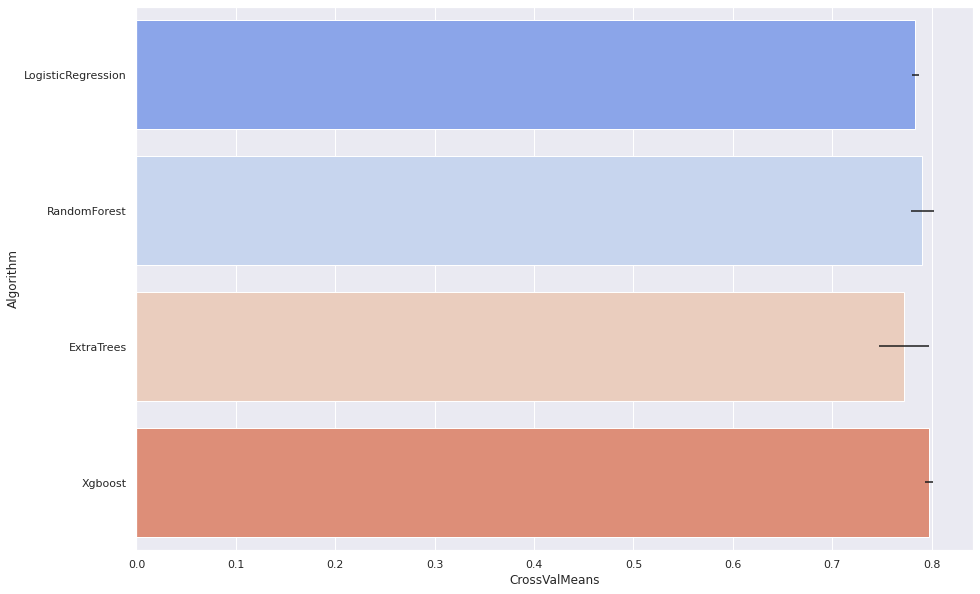

In [102]:
classifiers = [rnd_search_sgd_log_reg, rnd_search_rnd_for,
               rnd_search_ext_trees, rnd_search_xgb]

class_score_means = []
class_score_std = []
for classifier in classifiers:
    scores = []
    for i in range(5):
        temp = classifier.cv_results_['split' + str(i) + '_test_score']
        scores.append(temp)
    scores = np.asarray(scores)
    score_means = []
    for i in range(20):
        score_means.append(scores[:,i].mean())
    score_means = np.asarray(score_means)
    class_score_means.append(score_means.mean())
    class_score_std.append(score_means.std())
        
score_res = pd.DataFrame({'CrossValMeans': class_score_means, 'CrossValerrors': class_score_std,
                          'Algorithm': ['LogisticRegression', 'RandomForest', 'ExtraTrees', 'Xgboost']})
sns.barplot(x='CrossValMeans', y='Algorithm', data=score_res, palette=palette, orient="h",**{'xerr':class_score_std})
plt.show()

## 4.6. VotingClassifier

In [103]:
from sklearn.ensemble import VotingClassifier

In [104]:
voting_clf = VotingClassifier(estimators=[
            ('log_reg', best_sgd_log_reg), ('rfc', best_rnd_for),
            ('extc', best_ext_trees), ('xgb', best_xgb)],
            voting='soft', n_jobs=4
        )
voting_clf = voting_clf.fit(X_train, y_train)

# 5. Prediction

In [105]:
y_test_pred_vot = voting_clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': y_test_pred_vot})
output.to_csv('submission.csv', index=False)